In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline  

In [2]:
wine = pd.read_csv('winequality.csv', sep=';')

In [3]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.shape

(6497, 13)

## Exploratory Data Analysis

Análise de nulos

Primeiro vamos verificar a distribuição das variáveis

### Quality

In [5]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

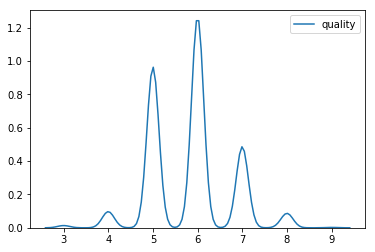

In [6]:
sns.kdeplot(wine.quality);

Apesar da descrição do desafio dizer que os valores estão entre 0 e 10, o dataset só possui valores entre 3 e 9. Percebemos também que existem apenas notas com valores inteiros, logo a qualidade do vinho é uma variável discreta (pelo menos para a amostra apresentada).

### type

In [7]:
wine.type.value_counts()

White    4898
Red      1599
Name: type, dtype: int64

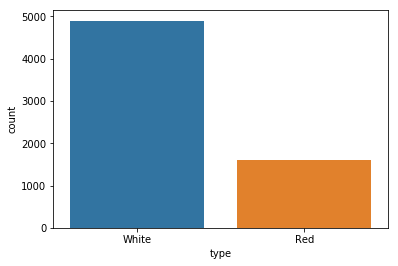

In [8]:
sns.countplot(x="type", data=wine)

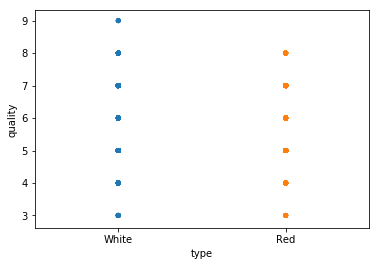

In [9]:
sns.stripplot(x="type", y="quality", data=wine);

Percebemos que há um número maior de vinhos Vermelhos do que vinhos Brancos. Comparando-se com a variável resposta vemos que o tipo do vinho branco possui notas 9, o que não acontece com o vinho vermelho. 

### fixed acidity

In [10]:
wine['fixed acidity'].describe()

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

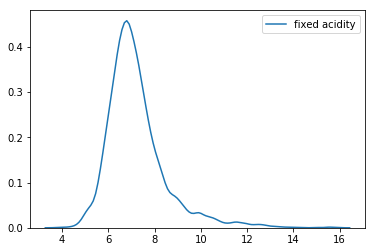

In [11]:
sns.kdeplot(wine['fixed acidity']);

Diferente do que acontece com a qualidade do vinho o `fixed acidity` é uma variável contínua. Vamos verificar a acidez fixa média de cada uma das notas de qualidade

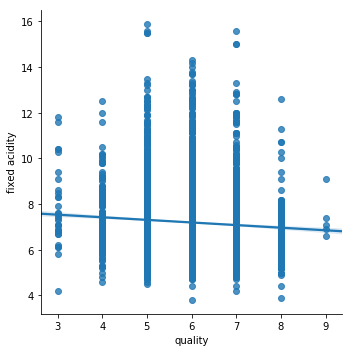

In [12]:
sns.lmplot(x="quality", y="fixed acidity", data=wine)

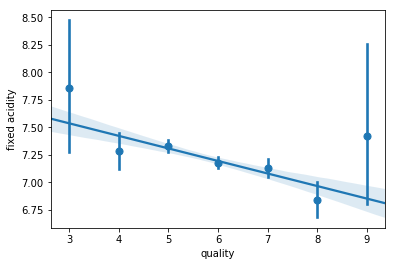

In [13]:
ax = sns.regplot(x="quality", y="fixed acidity", data=wine, x_estimator=np.mean)

É interessante como para qualidades entre 5 e 7 não há um desvio muito grande da acidez fixa média para a nota. Apesar disso as notas mais extremas (3 e 9) tendem a variar bastante a acidez e possuem poucos registros.

### volatile acidity	

In [14]:
wine['volatile acidity'].describe()

count    6497.000000
mean        0.339666
std         0.164636
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64

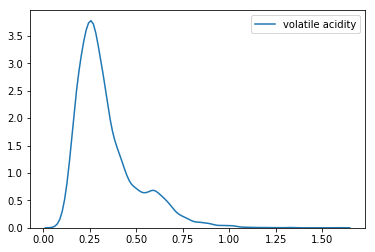

In [15]:
sns.kdeplot(wine['volatile acidity']);

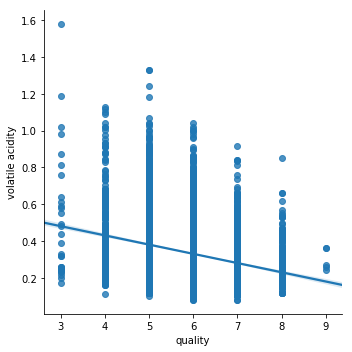

In [16]:
sns.lmplot(x="quality", y="volatile acidity", data=wine)

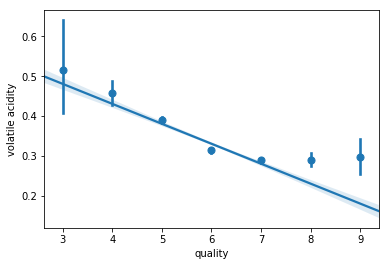

In [17]:
ax = sns.regplot(x="quality", y="volatile acidity", data=wine, x_estimator=np.mean)

Percebemos que a acidez volátil é mais baixa para os vinhos de qualidade mais alta, pelo menos até a qualidade 7. A partir da qualidade 7 a acidez volatil já não decresce tanto, mas 

### citric acid

In [18]:
wine['citric acid'].describe()

count    6497.000000
mean        0.318633
std         0.145318
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

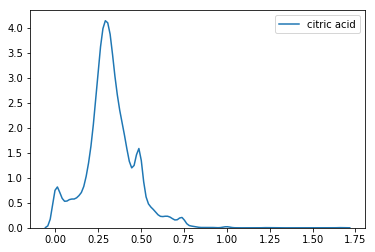

In [19]:
sns.kdeplot(wine['citric acid']);

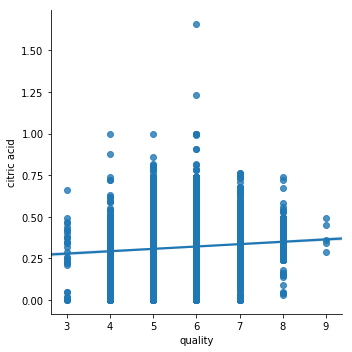

In [20]:
sns.lmplot(x="quality", y="citric acid", data=wine)

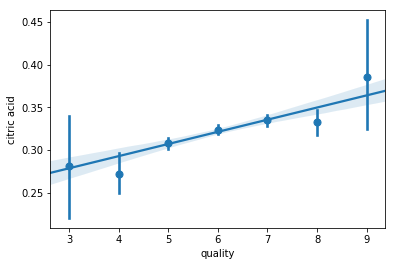

In [21]:
ax = sns.regplot(x="quality", y="citric acid", data=wine, x_estimator=np.mean)

Aqui já há um comportamento de crescente, mesmo que bem pequeno. Quanto mais alto o valor do ácido cítrico melhor a qualidade do vinho

### residual sugar	

In [22]:
wine['residual sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

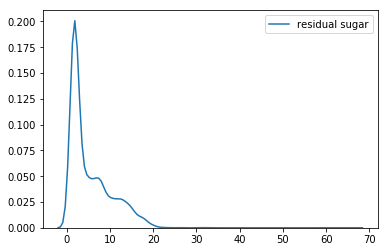

In [23]:
sns.kdeplot(wine['residual sugar']);

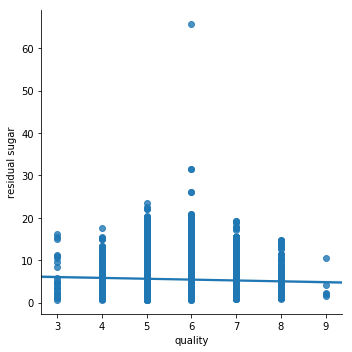

In [24]:
sns.lmplot(x="quality", y="residual sugar", data=wine)

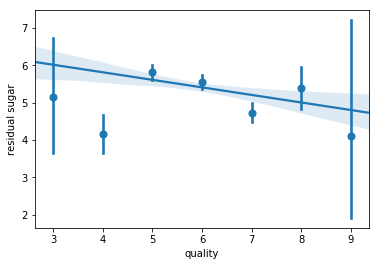

In [25]:
ax = sns.regplot(x="quality", y="residual sugar", data=wine, x_estimator=np.mean)

O `residual sugar` possui apenas um ponto acima de 65 para vinhos de qualidade 6, ponto bem distante da média do dataset (que é 5.44). O gráfico acima mostra a alta variância desta variável para as qualidades 3, 4, 8 e 9 o que pode ser prejudicial para alguns modelos de machine learning.

### chlorides

In [26]:
wine['chlorides'].describe()

count    6497.000000
mean        0.056034
std         0.035034
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

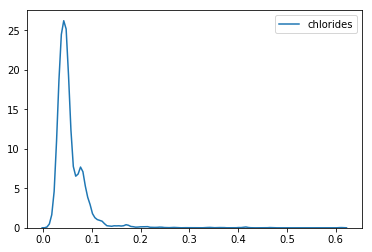

In [27]:
sns.kdeplot(wine['chlorides']);

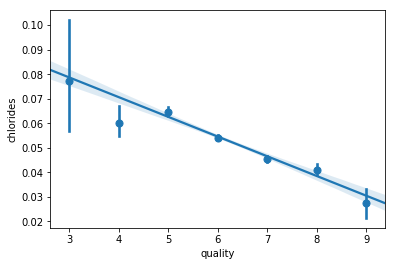

In [28]:
ax = sns.regplot(x="quality", y="chlorides", data=wine, x_estimator=np.mean)

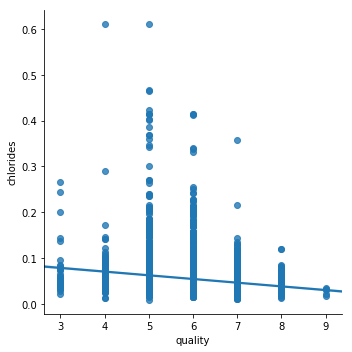

In [29]:
sns.lmplot(x="quality", y="chlorides", data=wine);

Aqui percebemos que quanto mais baixo o `chlorides` melhor o vinho. Apesar disso o dataset apresenta alguns valores muito altos para as qualidades 4 e 5 que talvez sejam outliers.

### free sulfur dioxide

In [30]:
wine['free sulfur dioxide'].describe()

count    6497.000000
mean       30.525319
std        17.749400
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

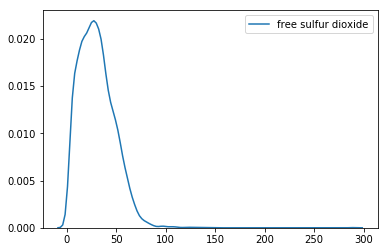

In [31]:
sns.kdeplot(wine['free sulfur dioxide']);

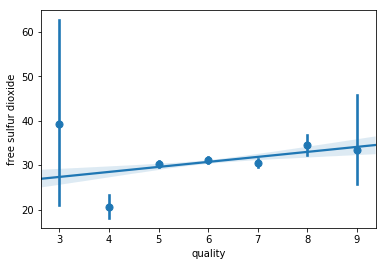

In [32]:
ax = sns.regplot(x="quality", y="free sulfur dioxide", data=wine, x_estimator=np.mean)

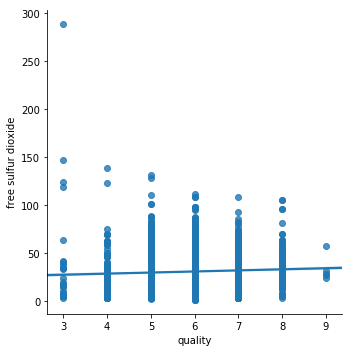

In [33]:
sns.lmplot(x="quality", y="free sulfur dioxide", data=wine)

A variável `free sulfur dioxide` também não apresenta grandes diferenças por qualidade do vinho (apesar do outlier na qualidade 3).

### total sulfur dioxide

In [34]:
wine['total sulfur dioxide'].describe()

count    6497.000000
mean      115.744574
std        56.521855
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

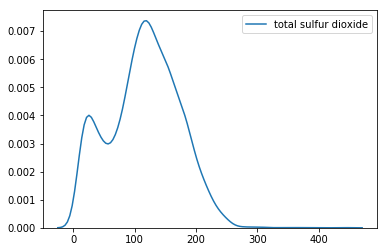

In [35]:
sns.kdeplot(wine['total sulfur dioxide']);

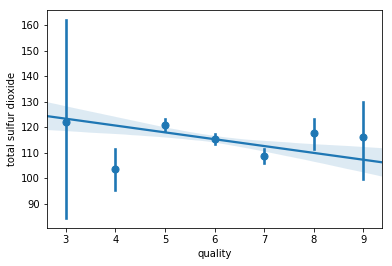

In [36]:
ax = sns.regplot(x="quality", y="total sulfur dioxide", data=wine, x_estimator=np.mean)

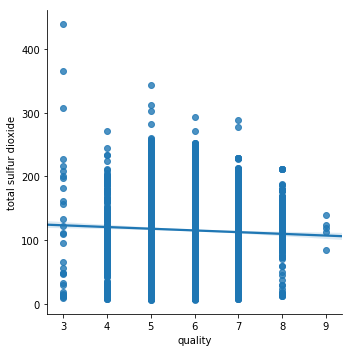

In [37]:
sns.lmplot(x="quality", y="total sulfur dioxide", data=wine)

### density

In [38]:
wine['density'].describe()

count    6497.000000
mean        1.710882
std         7.636088
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max       103.898000
Name: density, dtype: float64

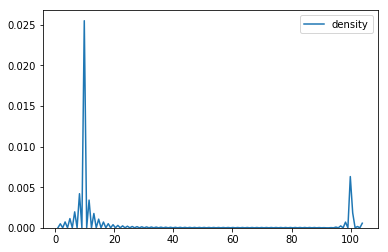

In [39]:
sns.kdeplot(wine['density']);

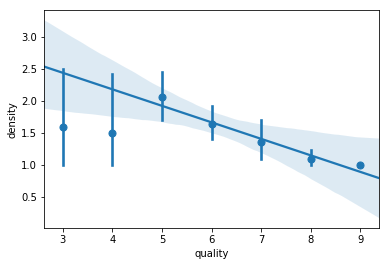

In [40]:
ax = sns.regplot(x="quality", y="density", data=wine, x_estimator=np.mean)

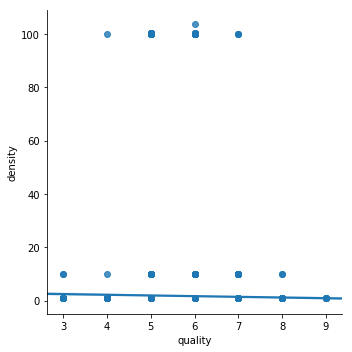

In [41]:
sns.lmplot(x="quality", y="density", data=wine)

### pH

In [42]:
wine['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

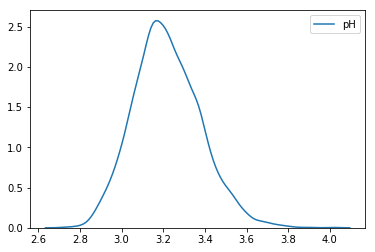

In [43]:
sns.kdeplot(wine['pH']);

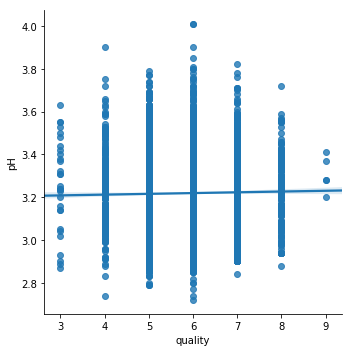

In [44]:
sns.lmplot(x="quality", y="pH", data=wine)

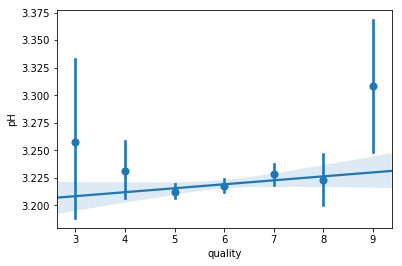

In [45]:
ax = sns.regplot(x="quality", y="pH", data=wine, x_estimator=np.mean)

### sulphates

In [46]:
wine['sulphates'].describe()

count    6497.000000
mean        0.531268
std         0.148806
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

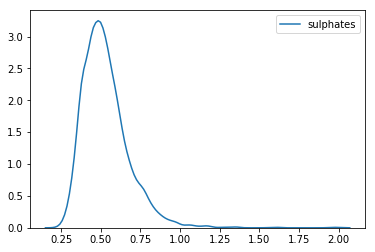

In [47]:
sns.kdeplot(wine['sulphates']);

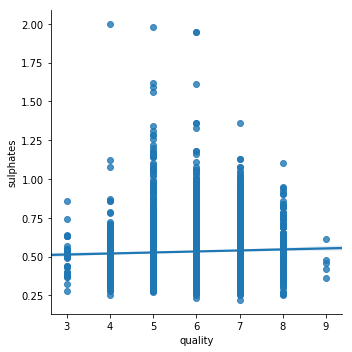

In [48]:
sns.lmplot(x="quality", y="sulphates", data=wine)

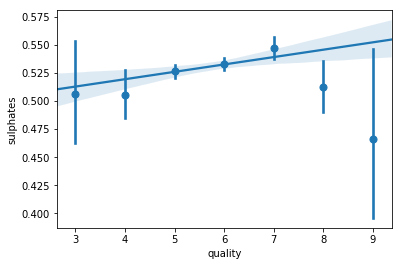

In [49]:
ax = sns.regplot(x="quality", y="sulphates", data=wine, x_estimator=np.mean)

### alcohol

A variável `alcohol` não parece totalmente correta. Existem valores acima de 100 e que não poderiam ser considerados valores para alcool de vinhos. Como esses valores correspondem a da 0.6% da amostra e não fazem sentido eles foram removidos do dataset.

In [50]:
alcohol_len = wine['alcohol'].apply(len)

In [51]:
len(wine.loc[alcohol_len > 5, 'alcohol'])/len(wine)

0.006156687702016315

In [52]:
wine.drop(wine.loc[alcohol_len > 5, 'alcohol'].index, inplace=True)

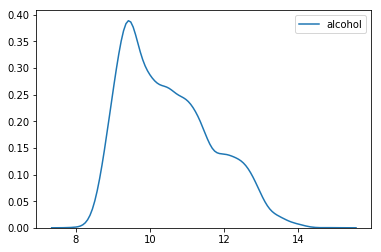

In [53]:
sns.kdeplot(wine['alcohol']);

In [54]:
wine['alcohol'] = wine['alcohol'].astype('float64', errors = 'ignore')

In [55]:
wine['alcohol'].describe()

count    6457.000000
mean       10.489083
std         1.192961
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

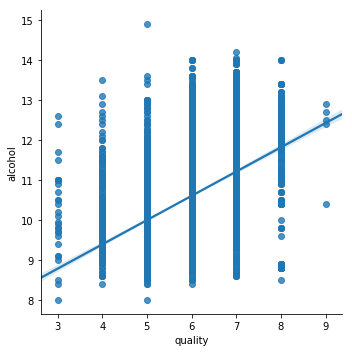

In [56]:
sns.lmplot(x="quality", y="alcohol", data=wine);

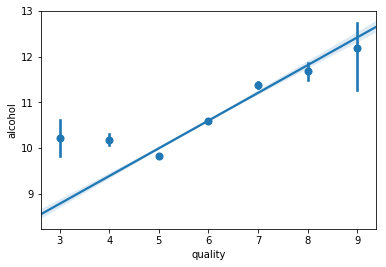

In [57]:
ax = sns.regplot(x="quality", y="alcohol", data=wine, x_estimator=np.mean)

É interessante observar como a qualidade do vinho sobe quando o teor alcoolico dele sobe também. Essa afirmação não é inteiramente verdadeira já que existem alguns outliers na amostra que nos levam a concluir isto, como podemos ver no gráfico acima. Por exemplo, as notas 3 e 4 possuem um teor alcoolico médio maior que a nota 5.

### Correlation matrix

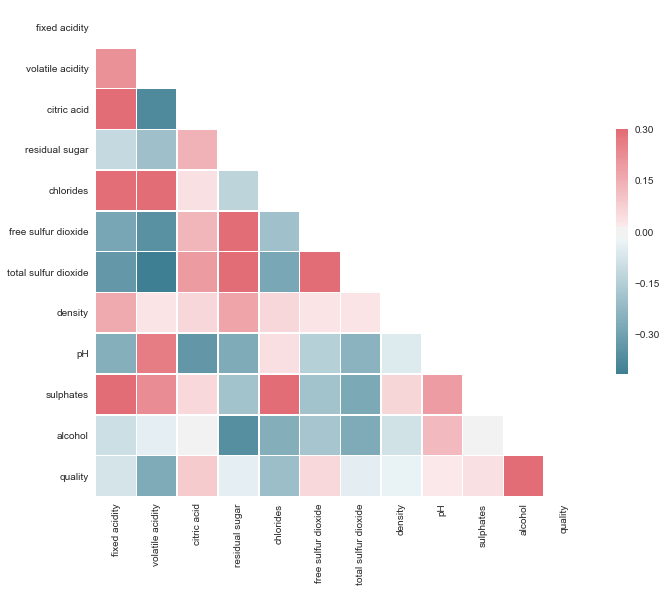

In [58]:
sns.set(style="white")

# Compute the correlation matrix
corr = wine.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A matrix de correlação mostra uma correlação baixa entre as variáveis. Portanto não precisamos retirar nenhuma por correlção.

Dado o comportamento apresentado na EDA das variáveis, usaremos as variáveis que pareceram mais interessante para uma primeira versão do modelo:

 - chlorides
 - fixed acidity
 - volatile acidity
 - citric acid
 - pH
 - sulphates (tree)
 - alcohol

In [59]:
variables = wine[['chlorides', 'fixed acidity', 'volatile acidity', 'citric acid', 'sulphates', 'alcohol']]

In [60]:
variables.head()

,chlorides,fixed acidity,volatile acidity,citric acid,sulphates,alcohol
0,0.045,7.0,0.27,0.36,0.45,8.8
1,0.049,6.3,0.30,0.34,0.49,9.5
2,0.050,8.1,0.28,0.40,0.44,10.1
3,0.058,7.2,0.23,0.32,0.40,9.9
4,0.058,7.2,0.23,0.32,0.40,9.9


In [61]:
X_train, X_test, y_train, y_test = train_test_split(variables, wine['quality'], test_size=0.3, random_state=42)

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
regr = linear_model.LinearRegression()

In [64]:
regr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
y_pred = regr.predict(X_test_scaled)

In [66]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.56
R2: 0.25


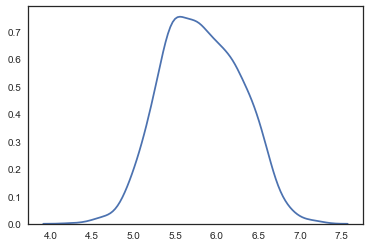

In [67]:
sns.kdeplot(y_pred)
plt.legend();

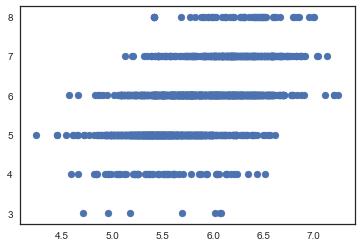

In [68]:
# Plot outputs
plt.scatter(y_pred, y_test)

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rfr = RandomForestRegressor(random_state=42, max_leaf_nodes=10, min_samples_leaf=10)

In [71]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=10,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
y_pred = rfr.predict(X_test)

In [73]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.54
R2: 0.28


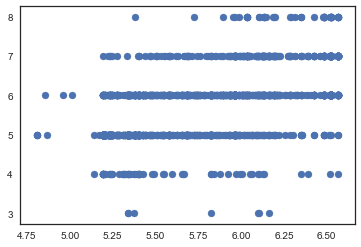

In [74]:
# Plot outputs
plt.scatter(y_pred, y_test)

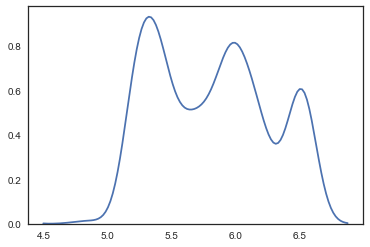

In [75]:
sns.kdeplot(y_pred)
plt.legend();

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

force = False
model_trainer = RandomizedSearchCV(
    n_iter=48, 
    estimator=RandomForestRegressor(),
    param_distributions={
        "criterion": ["mse"],
        "n_estimators": [20, 35, 50, 100, 150, 200],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [.05, .15, .1, .2,],
        "bootstrap": [True],
        "oob_score": [True],
        "random_state": [42]
    },
    scoring="neg_mean_squared_error",
    verbose=True,
    refit=True,
    cv=5,
    n_jobs=-1
)

In [77]:
%%time
model_trainer.fit(X_train, y_train)
model = model_trainer.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   21.7s finished


CPU times: user 1.15 s, sys: 57.3 ms, total: 1.2 s
Wall time: 22.6 s


In [78]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=0.05,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [79]:
yp = model.predict(X_test)
yt = y_test

In [80]:
print("Mean squared error: %.2f"
      % mean_squared_error(yt, yp))
# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(yt, yp))

Mean squared error: 0.52
R2: 0.30


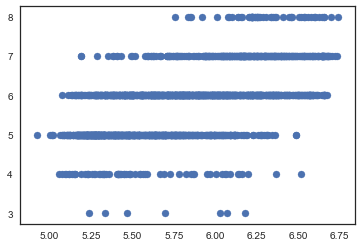

In [81]:
# Plot outputs
plt.scatter(yp, yt)

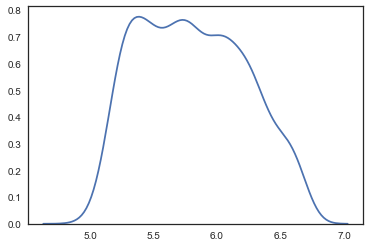

In [82]:
sns.kdeplot(yp)
plt.legend();